In [267]:
import numpy as np
import pandas as pd

In [268]:
#reading the csv file adn printing the column names
df=pd.read_csv(r"Admission_Predict_Ver1.1.csv")
col_names=df.columns.tolist()
print("Column names:")
print(col_names)


Column names:
['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [269]:
# printing information such as number of entries, columns with their names, datatypes etc
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [270]:
# printing first 5 entries of the dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [271]:
# printing last 5 entries of the dataframe
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [272]:
print('Missing values in columns:')
df.isnull().sum()

Missing values in columns:


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [273]:
# before changing the column names
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [275]:
df=df.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit ':'chance'})

In [276]:
# after changing the column names
df.describe()

,no,gre,toefl,rating,sop,lor,gpa,research,chance
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [277]:
# basic statistics of data
df.groupby('rating').mean()


,no,gre,toefl,sop,lor,gpa,research,chance
rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [278]:
df[df['chance']>0.82].groupby('chance').mean()

,no,gre,toefl,rating,sop,lor,gpa,research
chance,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


In [279]:
df[df['gpa']>9.5].groupby('gpa').mean()

,no,gre,toefl,rating,sop,lor,research,chance
gpa,,,,,,,,
9.53,194.000000,336.000000,118.000000,5.000000,4.50,5.00,1.0,0.940000
9.54,393.000000,334.000000,117.500000,4.500000,4.25,4.25,1.0,0.935000
9.56,309.500000,332.500000,118.500000,5.000000,4.75,5.00,1.0,0.935000
9.60,171.000000,336.000000,116.666667,4.666667,4.50,4.00,1.0,0.923333
9.62,373.000000,336.000000,119.000000,4.000000,4.50,4.00,1.0,0.950000
9.64,71.000000,332.000000,118.000000,5.000000,5.00,5.00,1.0,0.940000
9.65,1.000000,337.000000,118.000000,4.000000,4.50,4.50,1.0,0.920000
9.66,299.333333,337.000000,116.333333,4.000000,5.00,4.50,1.0,0.946667
9.67,447.000000,327.000000,118.000000,4.000000,5.00,5.00,1.0,0.930000


In [280]:
from statistics import mode 
mode(df['chance'])

0.71

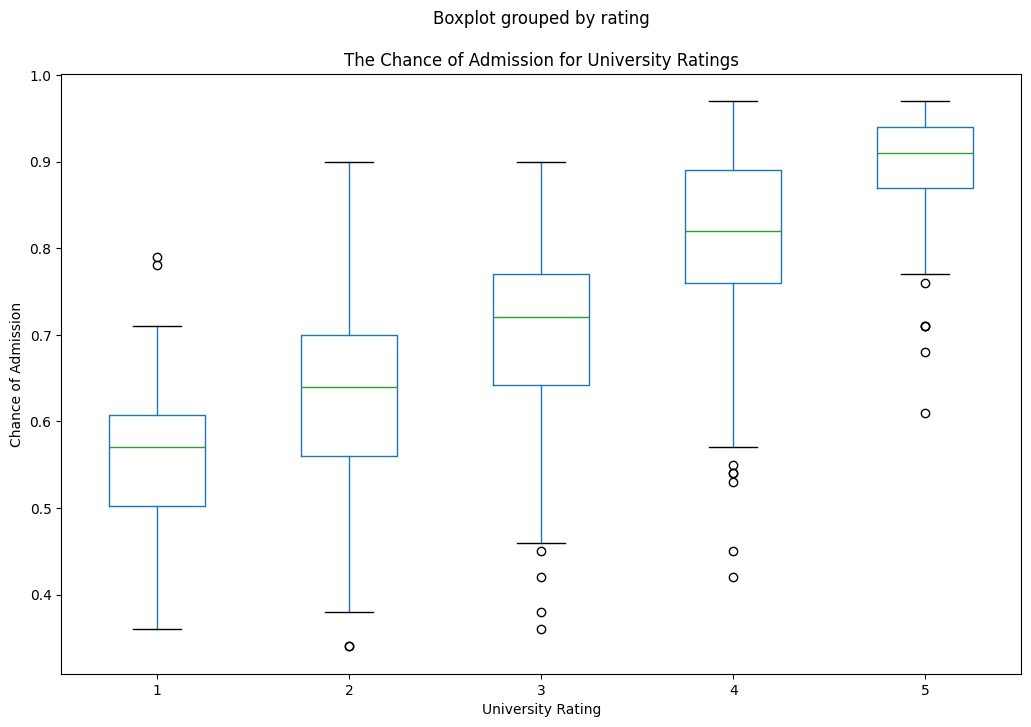

In [281]:
# data visualization
# box plot
df.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

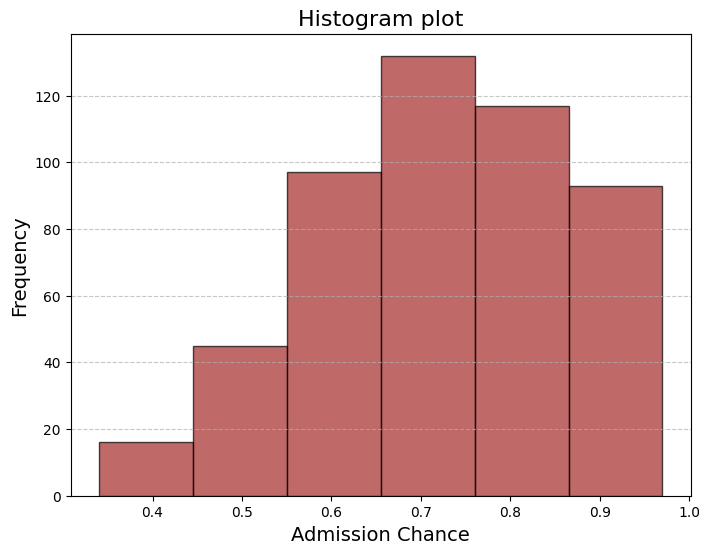

In [258]:
# data visualization
# histogram of chance of admission
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(df['chance'],bins=6,color="brown",  edgecolor='black', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Histogram plot', fontsize=16)
plt.xlabel('Admission Chance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

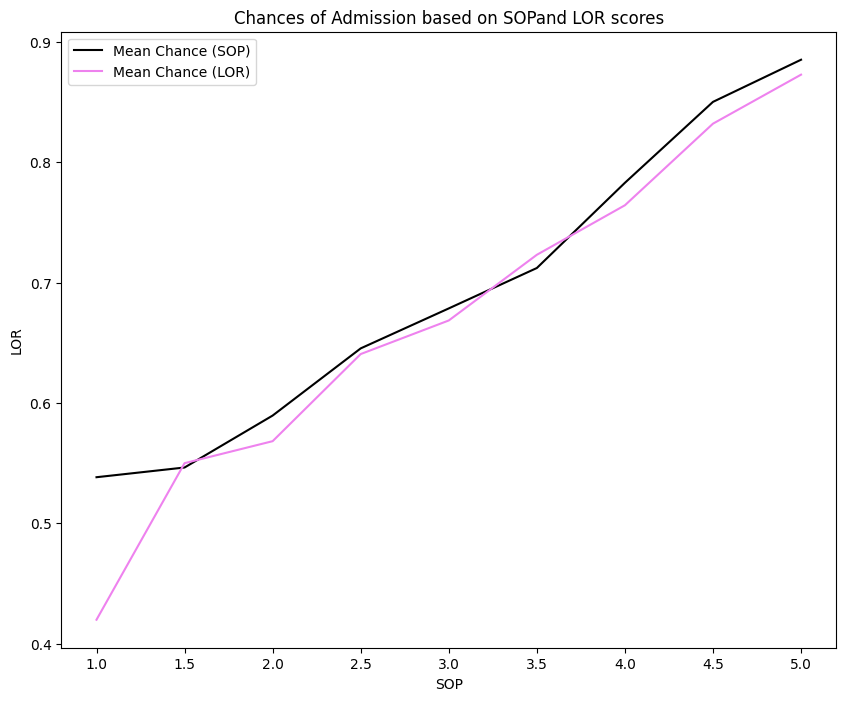

In [259]:
plt.figure(figsize=(10,8))

plt.plot(df.groupby('sop').mean().index, df.groupby('sop')['chance'].mean(), color='black', label='Mean Chance (SOP)')
plt.plot(df.groupby('lor').mean().index, df.groupby('lor')['chance'].mean(), color='violet', label='Mean Chance (LOR)')
plt.xlabel('SOP')
plt.ylabel('LOR')
plt.title('Chances of Admission based on SOPand LOR scores')
plt.legend()
plt.show()

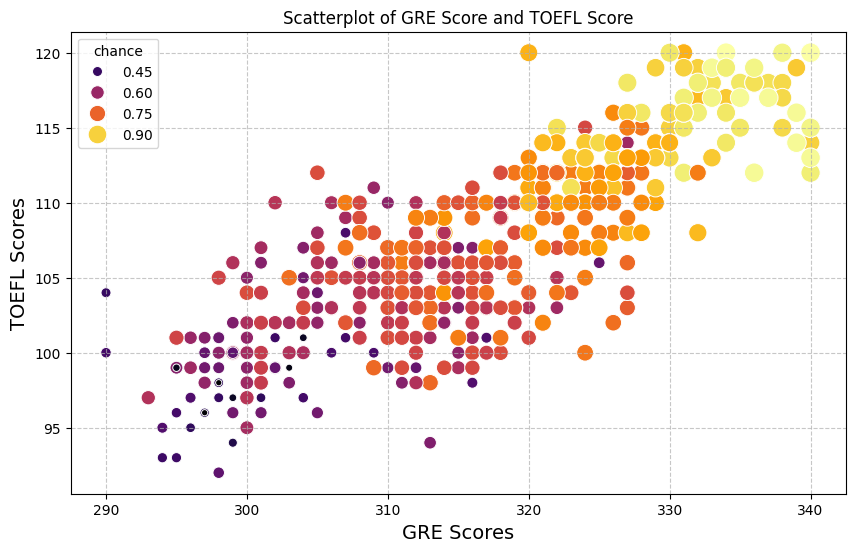

In [260]:

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gre', y='toefl', hue='chance', data=df, palette='inferno', size='chance', sizes=(20, 200))

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Scatterplot of GRE Score and TOEFL Score')
plt.xlabel('GRE Scores', fontsize=14)
plt.ylabel('TOEFL Scores', fontsize=14)
plt.show()

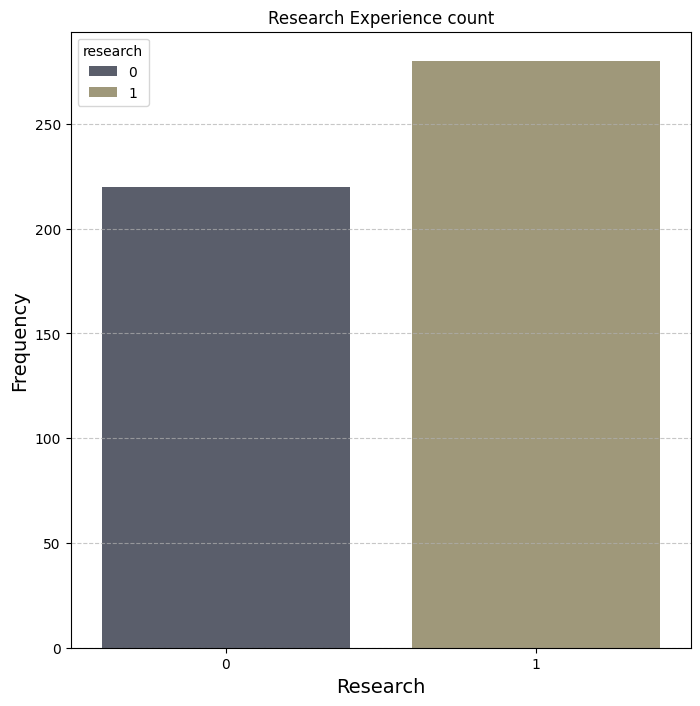

In [261]:
plt.figure(figsize=(8, 8))
sns.countplot(x='research', hue = 'research', data=df, palette='cividis')
plt.title('Research Experience count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Research', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

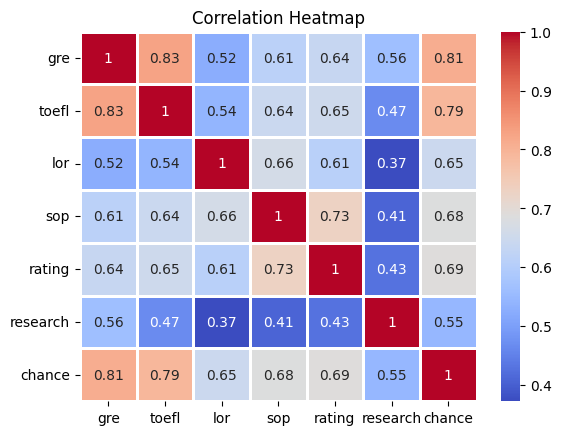

In [262]:
correlation_matrix = df[['gre', 'toefl', 'lor', 'sop', 'rating', 'research', 'chance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.9)
plt.title('Correlation Heatmap')
plt.show()

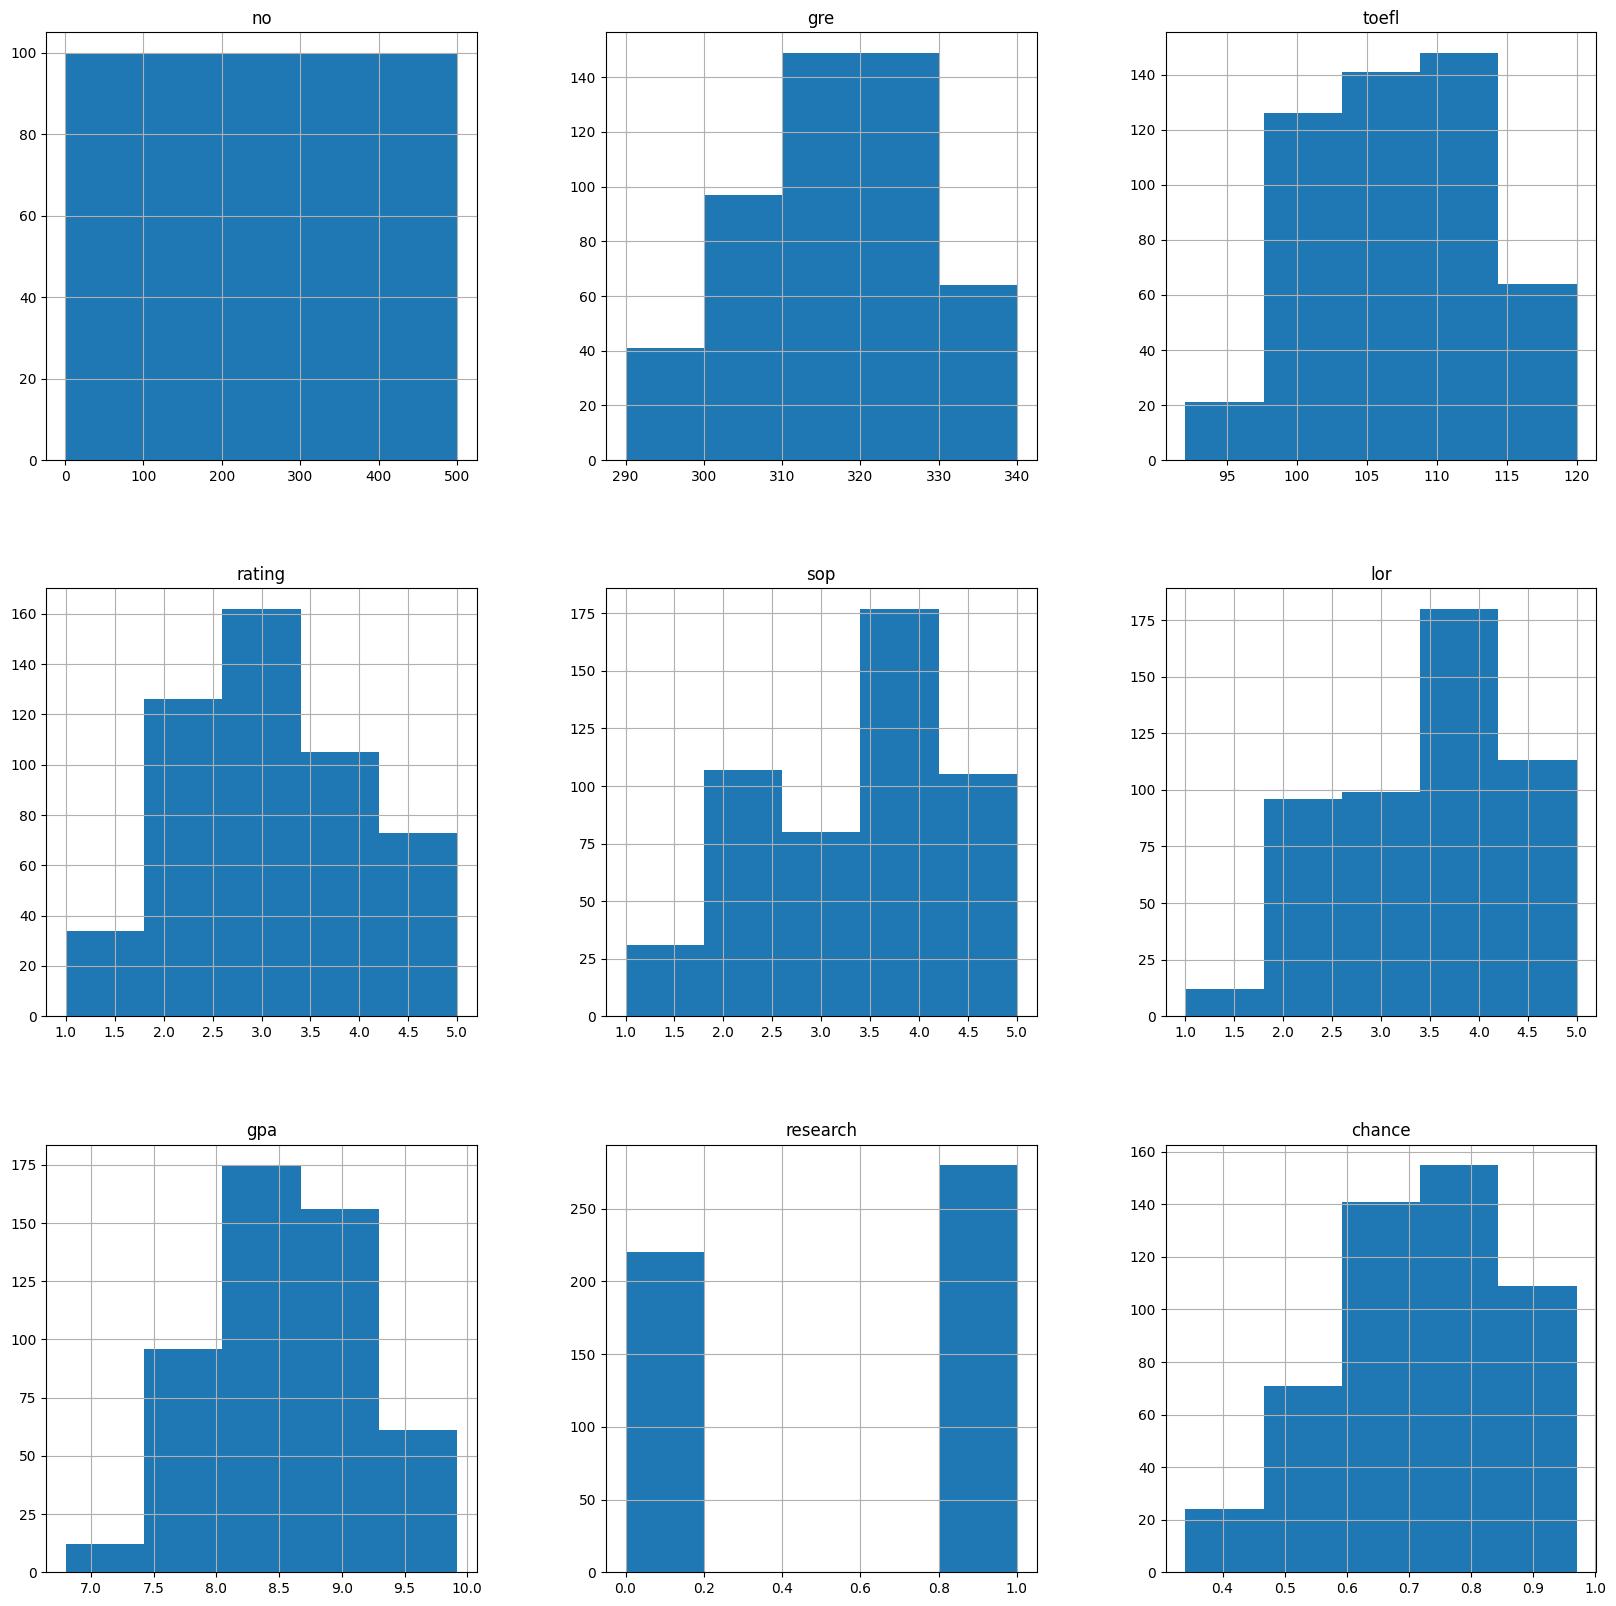

In [282]:
df.hist(bins = 5,figsize = (20,20))
plt.show()

In [283]:
df.drop(['no'],axis=1,inplace=True)
var=df.columns.values.tolist()
y=df['chance']
x = [i for i in var if i != 'chance']
x = df[x]

In [284]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [173]:
# from sklearn.preprocessing import MinMaxScaler
# xs=MinMaxScaler()
# x_train[x_train.columns] = xs.fit_transform(x_train[x_train.columns])
# x_test[x_test.columns] = xs.transform(x_test[x_test.columns])

In [285]:
import numpy as np
cy_train=[1 if chance > 0.83 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.83 else 0 for chance in y_test]
cy_test=np.array(cy_test)

Accuracy: 0.9700




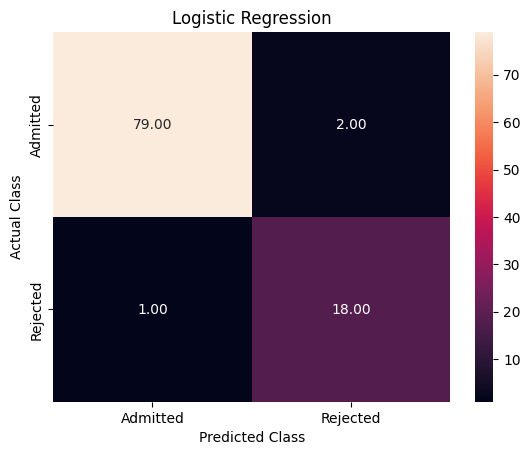

In [293]:
# logistic regression model
label=[]
accuracy=[]
from sklearn.linear_model import LogisticRegression
l = LogisticRegression(solver='liblinear')
l.fit(x_train, cy_train)

cy = l.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy: {:.4f}'.format(accuracy_score(cy_test, cy)))
print('\n')
label.append('LR')
accuracy.append(l.score(x_test, cy_test))


from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test)
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression')
plt.show()

Random Forest Accuracy: 0.9700




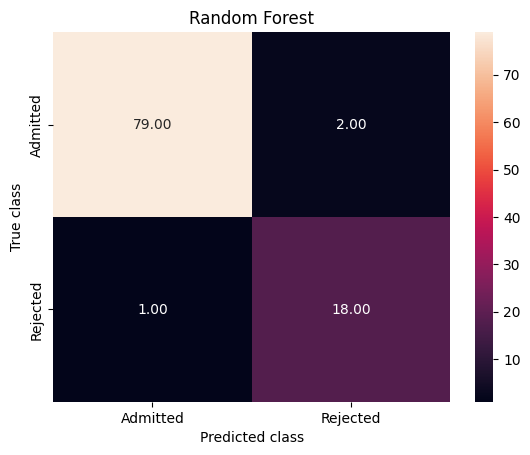

In [294]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, cy_train)

cy = rf.predict(x_test)
print('Random Forest Accuracy: {:.4f}'.format(accuracy_score(cy_test, cy)))
print('\n')
label.append('RF')
accuracy.append(rf.score(x_test, cy_test))
rf_confm = confusion_matrix(cy, cy_test)
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

Support vector machine accuracy: 0.8000




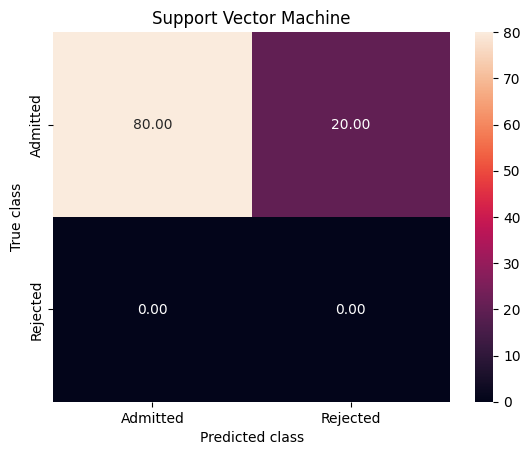

In [295]:
# support vector machine model
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, cy_train)

print('Support vector machine accuracy: {:.4f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('\n')
label.append('SVM')
accuracy.append(svm.score(x_test, cy_test))
cy = svm.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test)
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()

Accuracy: 0.9300




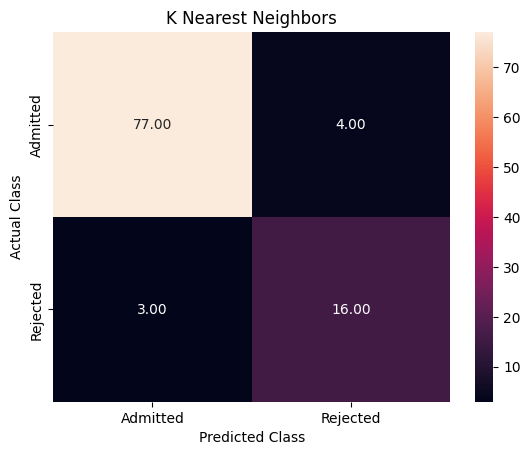

In [296]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, cy_train)

cy = knn_classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy: {:.4f}'.format(accuracy_score(cy_test, cy)))
print('\n')
label.append('KNN')
accuracy.append(knn_classifier.score(x_test, cy_test))


from sklearn.metrics import confusion_matrix
import seaborn as sns
knn_confm = confusion_matrix(cy, cy_test)
sns.heatmap(knn_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('K Nearest Neighbors')
plt.show()


In [302]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.bar(index, accuracy)

    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Accuracy of different models')
    plt.savefig("model_accuracy.png")
    
    plt.show()

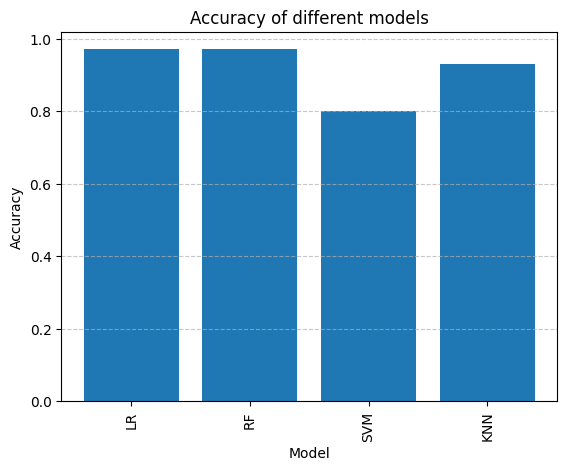

In [303]:

plot_bar_x()